# K-Means


- import

In [43]:
# !pip install pandas

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import distance
from sklearn.cluster import KMeans
import random

- Đọc và xử lý data

In [45]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [46]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [47]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

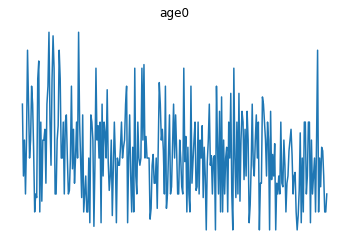

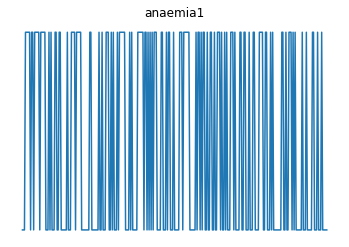

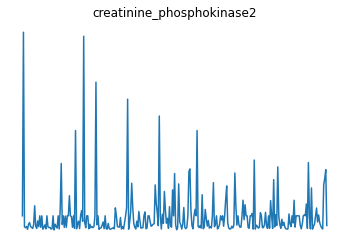

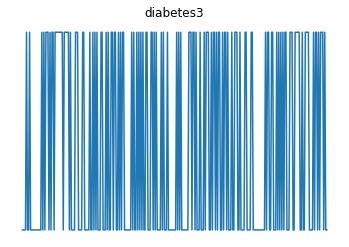

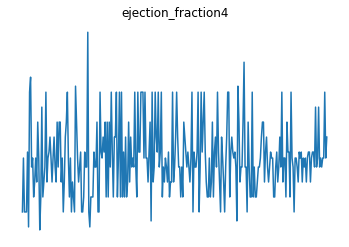

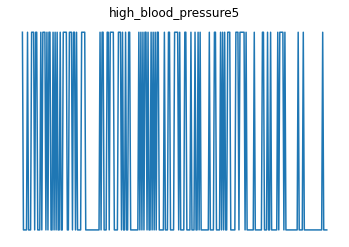

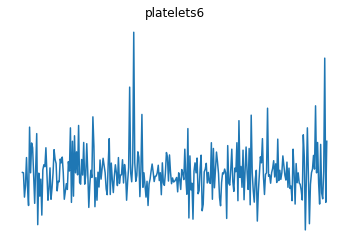

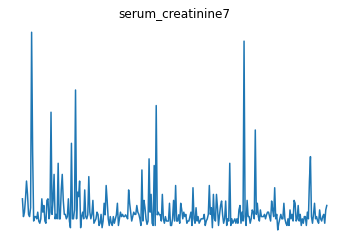

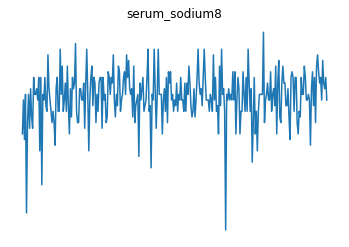

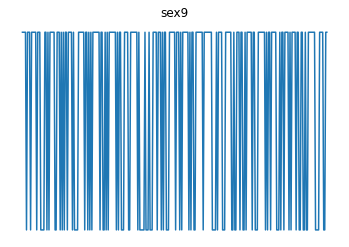

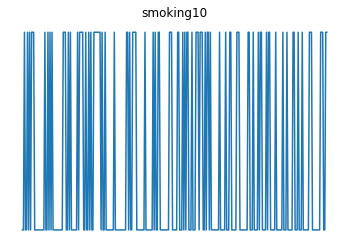

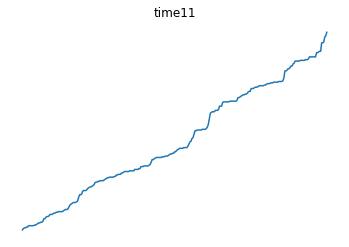

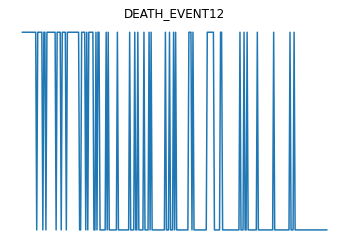

In [48]:
for i in range(13):
    plt.plot(data[data.columns[i]])
    plt.title(data.columns[i]+str(i))
    plt.axis("off")
    plt.show()


hàm khoảng cách với công thức euclide :
![euclide](./image/cong_thuc_euclide.png)

In [49]:
def distance_euclide(a, b):
    return distance.euclidean(a,b)

- hàm so sánh 1 điểm dữ liệu sẽ thuộc về tâm nào, lấy index của tâm cụm đó

In [50]:
def compare_distance(dt,cluters):
    distancedata = [distance_euclide(dt ,cluter) for cluter in cluters]
    return distancedata.index(min(distancedata))

- tính state trả về trạng thái của data(thuộc tâm nào)

In [51]:
def state_data(data, cluters):
    state = [[] for _ in cluters] # chứa số lượng cụm
    for dt in data:
        index_min_distance = compare_distance(dt, cluters)
        state[index_min_distance].append(dt)
    return state

In [52]:
def kmean(data, num_cluters:int):
    rd_index = np.random.choice(range(len(data)),num_cluters)
    cluters = [data[i] for i in rd_index]
    time = 0
    while True:
        time+=1
        # để chia dữ liệu về các cụm tương ứng [[điểm dữ liệu 1, điểm dữ liệu 2,...], []]
        state = state_data(data, cluters)
        # tính 2 tâm cụm mới, axis = 0 là theo cột, state có dạng [cột 1, cột 2]
        next_cluters = [np.average(cluter,axis=0) for cluter in state ]
        for c in state:
            x = [v[0] for v in c]
            y = [v[1] for v in c]
            plt.scatter(x,y)
        plt.title(time)
        plt.show()
        # tâm cụm mới trừ tâm cụm cũ, nếu = 0 là dừng
        if np.sum(np.subtract(cluters,next_cluters))!=0: 
            cluters = next_cluters
        else:
            break
    return cluters
        

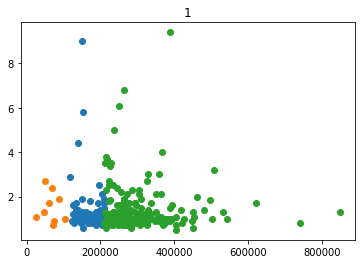

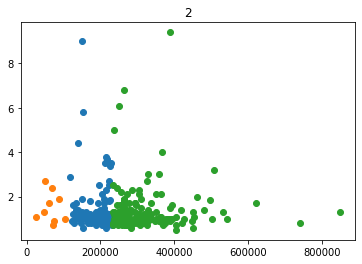

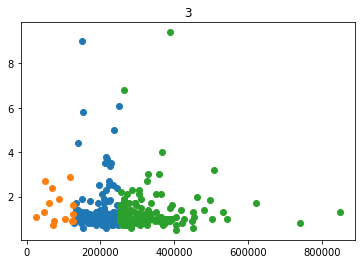

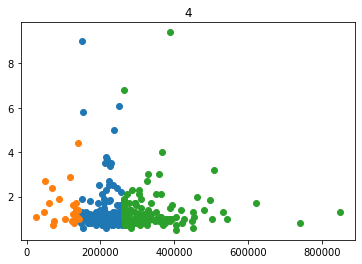

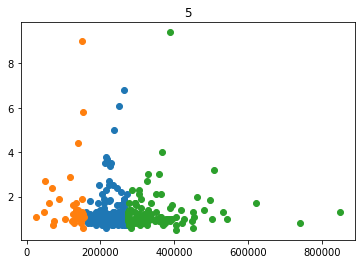

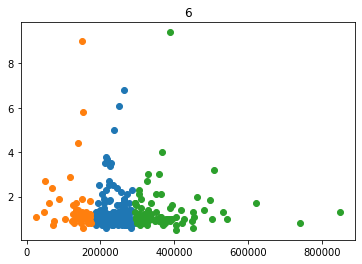

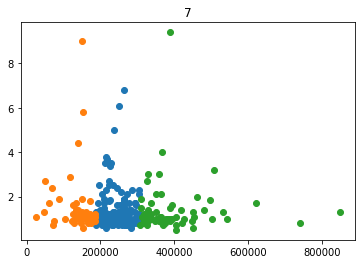

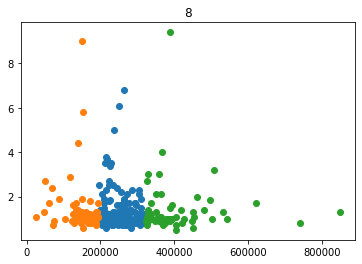

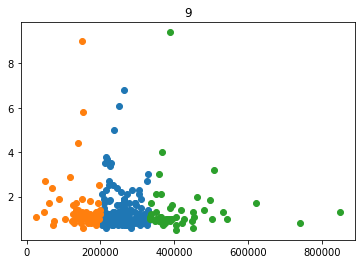

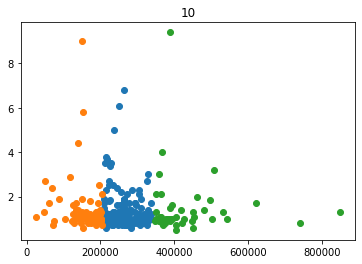

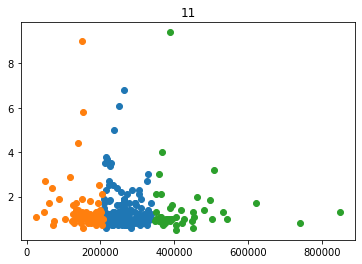

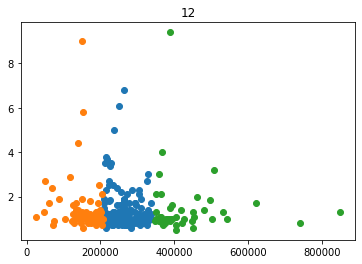

In [53]:
inputdata = list(zip(data['platelets'],data['serum_creatinine'], data['serum_sodium']))
clusters = []
clusters = kmean(inputdata,3)

In [54]:
def predict(clusters, point):
    return compare_distance(point, clusters)

In [55]:
point = inputdata[0]
predict(clusters, point)

0